Name: Hikmet Terzioglu

ID: 161101071

Course: BIL570 /BIL470

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dt import DecisionTreeClassifier
from kmeans import KMeansClusterClassifier

# Exploratory Data Analysis (EDA)

### Read Dataset

In [3]:
iris = pd.read_csv("Iris.csv");

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Improve dataset:
Remove id column 
Change Class labels that are given in the last column to  integer values (0, 1, 2);

In [5]:
iris = iris.drop(columns=['Id'])


class_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

iris['Species'] = iris['Species'].map(class_mapping)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dataset Summary

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [11]:
# İlk 5 satırı görüntüle
print(iris.head())

# Son 5 satırı görüntüle
print(iris.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2


In [12]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


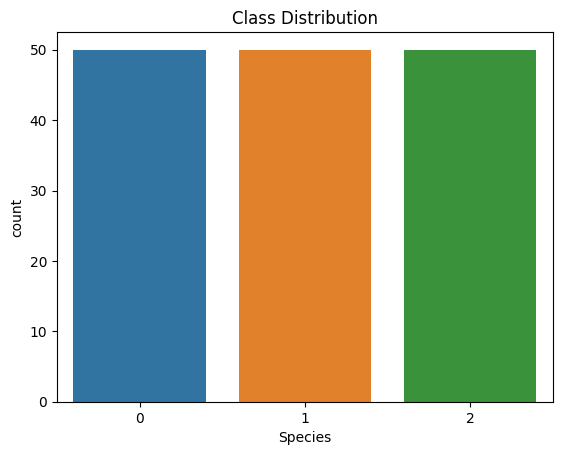

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıfların sayısal dağılımı
sns.countplot(x='Species', data=iris)
plt.title('Class Distribution')
plt.show()

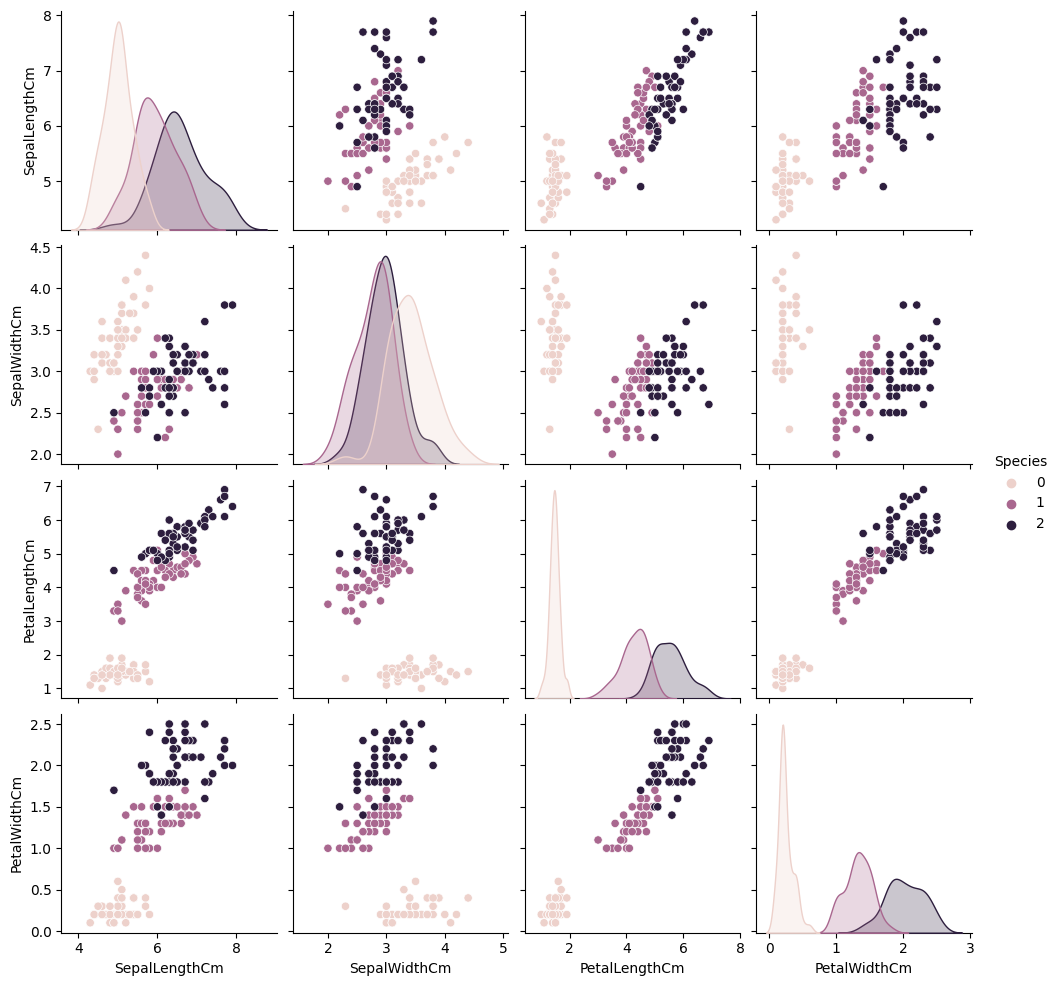

In [14]:
# Özelliklerin çift değişkenli analizi
sns.pairplot(iris, hue='Species')
plt.show()

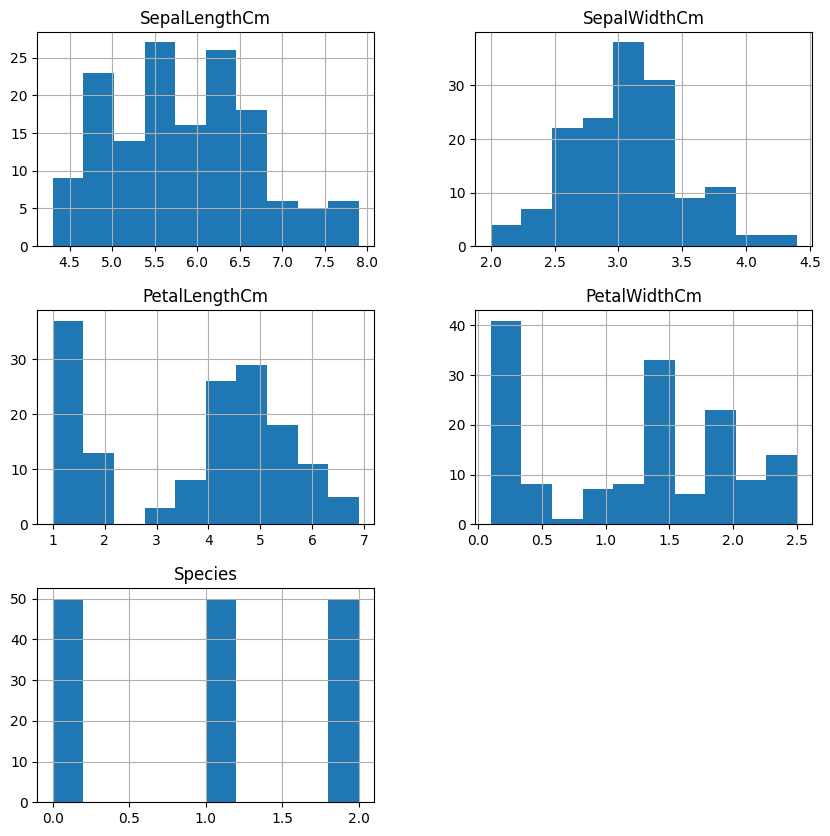

In [15]:
iris.hist(figsize=(10, 10))
plt.show()

#### General image of dataset

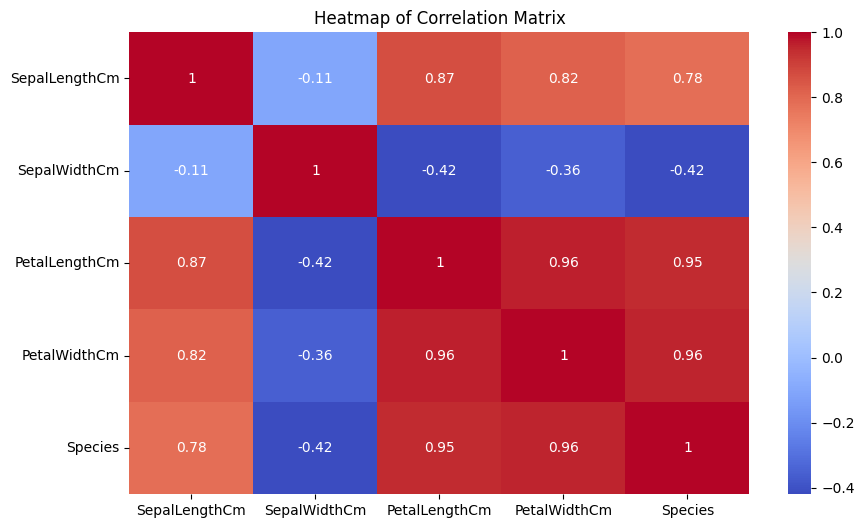

In [16]:
# Korelasyon matrisi ısı haritası
plt.figure(figsize=(10, 6))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

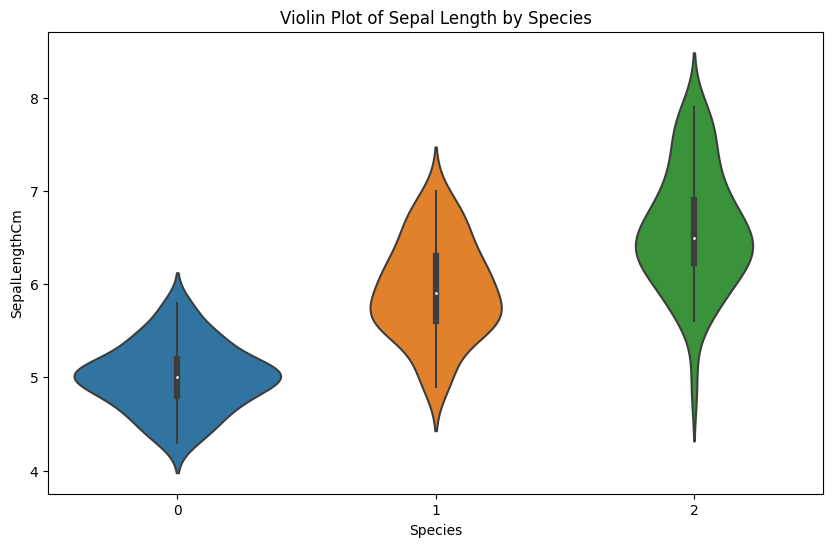

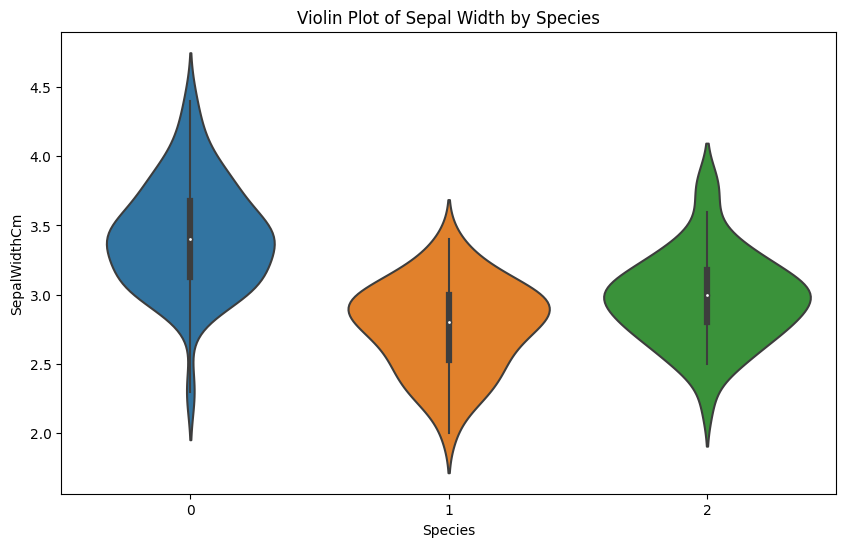

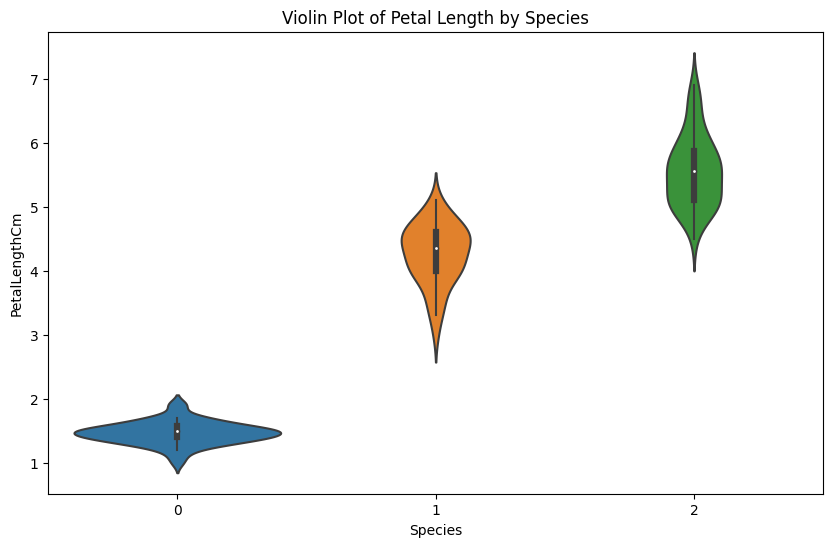

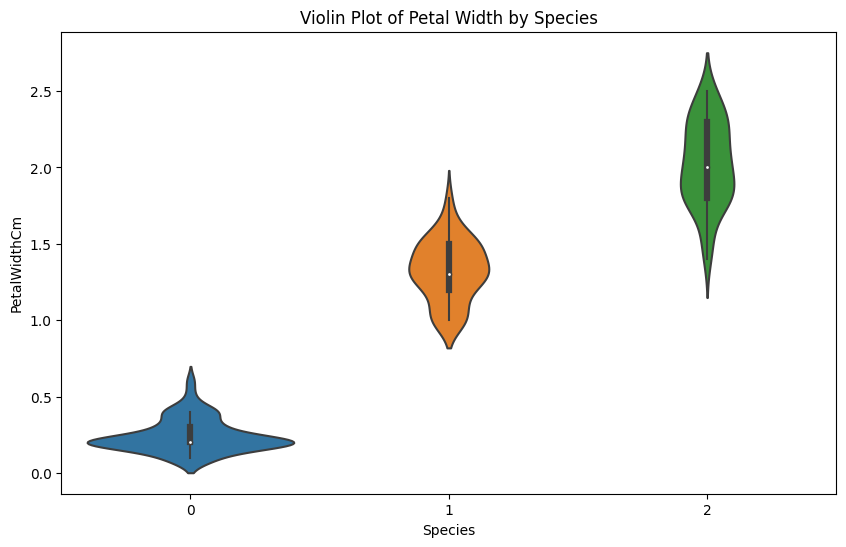

In [17]:
# Violin grafikleri
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)
plt.title('Violin Plot of Sepal Width by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Violin Plot of Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)
plt.title('Violin Plot of Petal Width by Species')
plt.show()

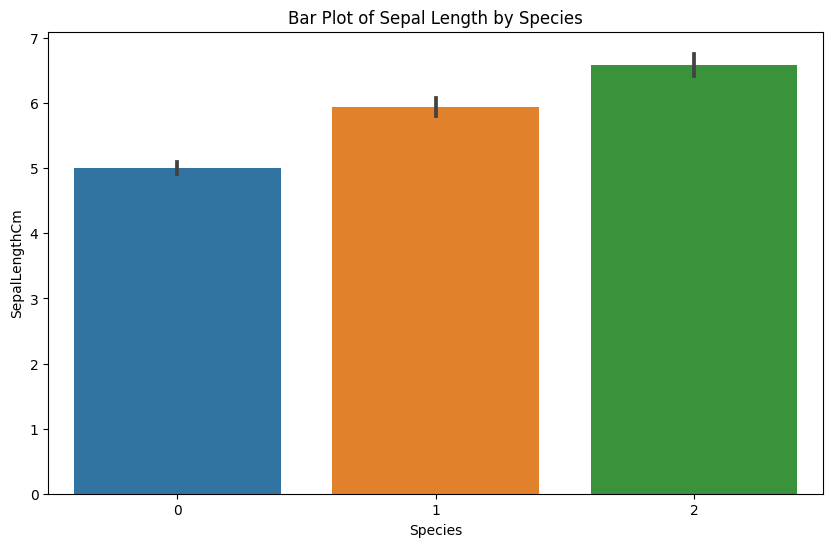

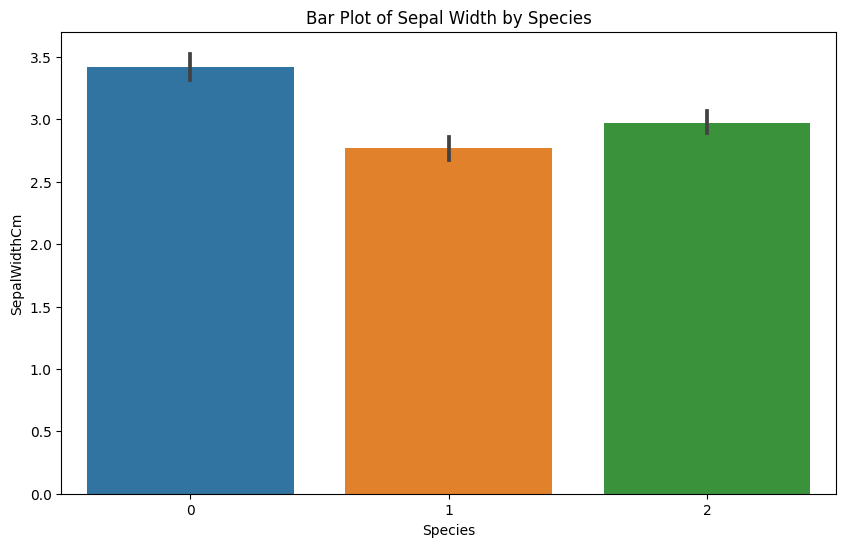

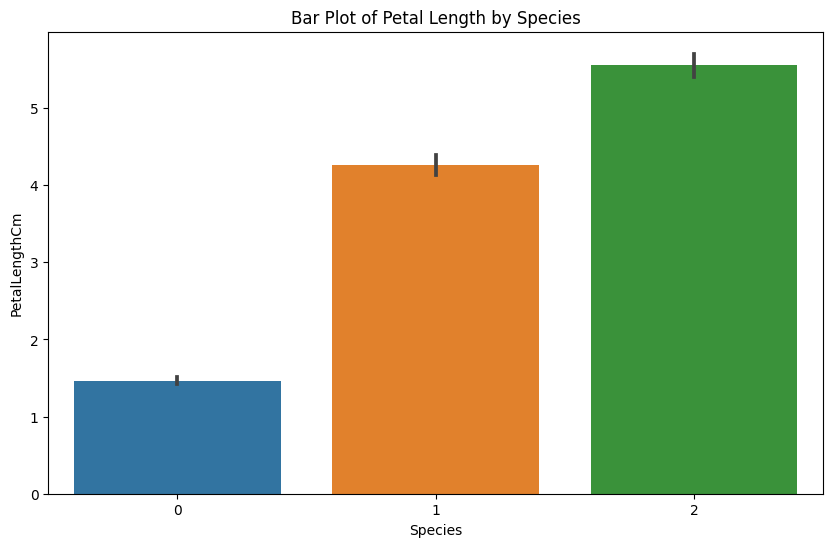

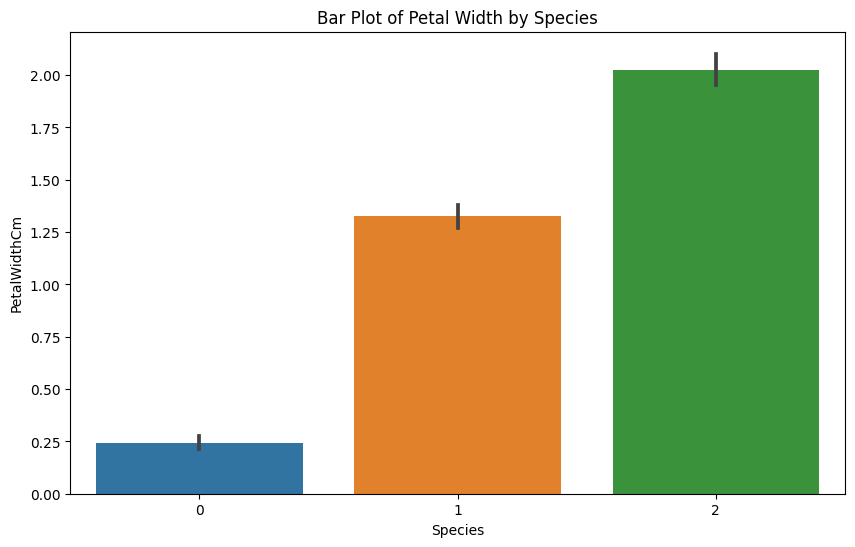

In [18]:
# Çiftli bar grafikleri
plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Bar Plot of Sepal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='SepalWidthCm', data=iris)
plt.title('Bar Plot of Sepal Width by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Bar Plot of Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='PetalWidthCm', data=iris)
plt.title('Bar Plot of Petal Width by Species')
plt.show()

#### Duplicated data in the dataset

In [19]:
# Tekrar eden verileri kontrol et
duplicates = iris.duplicated()

# Tekrar eden verilerin sayısını görüntüle
print("Number of duplicate rows: ", duplicates.sum())

# Tekrar eden verileri göster
print(iris[duplicates])

Number of duplicate rows:  3
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
34             4.9           3.1            1.5           0.1        0
37             4.9           3.1            1.5           0.1        0
142            5.8           2.7            5.1           1.9        2


In [20]:
iris_cleaned = iris.drop_duplicates()

In [21]:
print("Number of rows after removing duplicates: ", len(iris_cleaned))
print(iris_cleaned.head())

Number of rows after removing duplicates:  147
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


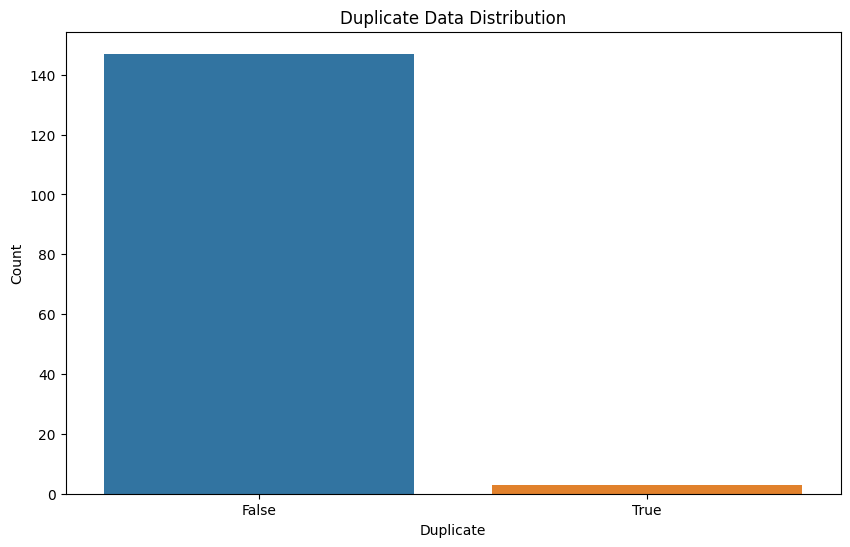

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tekrar eden verilerin dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x=duplicates)
plt.title('Duplicate Data Distribution')
plt.xlabel('Duplicate')
plt.ylabel('Count')
plt.show()

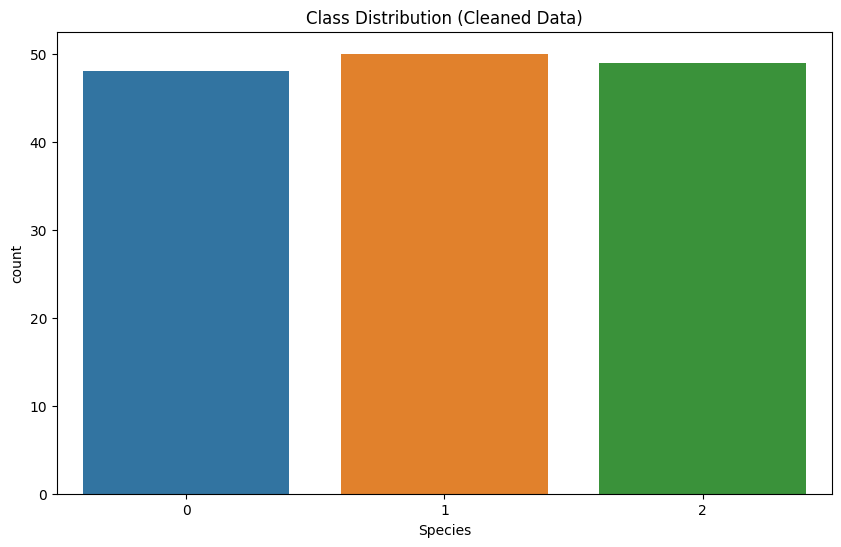

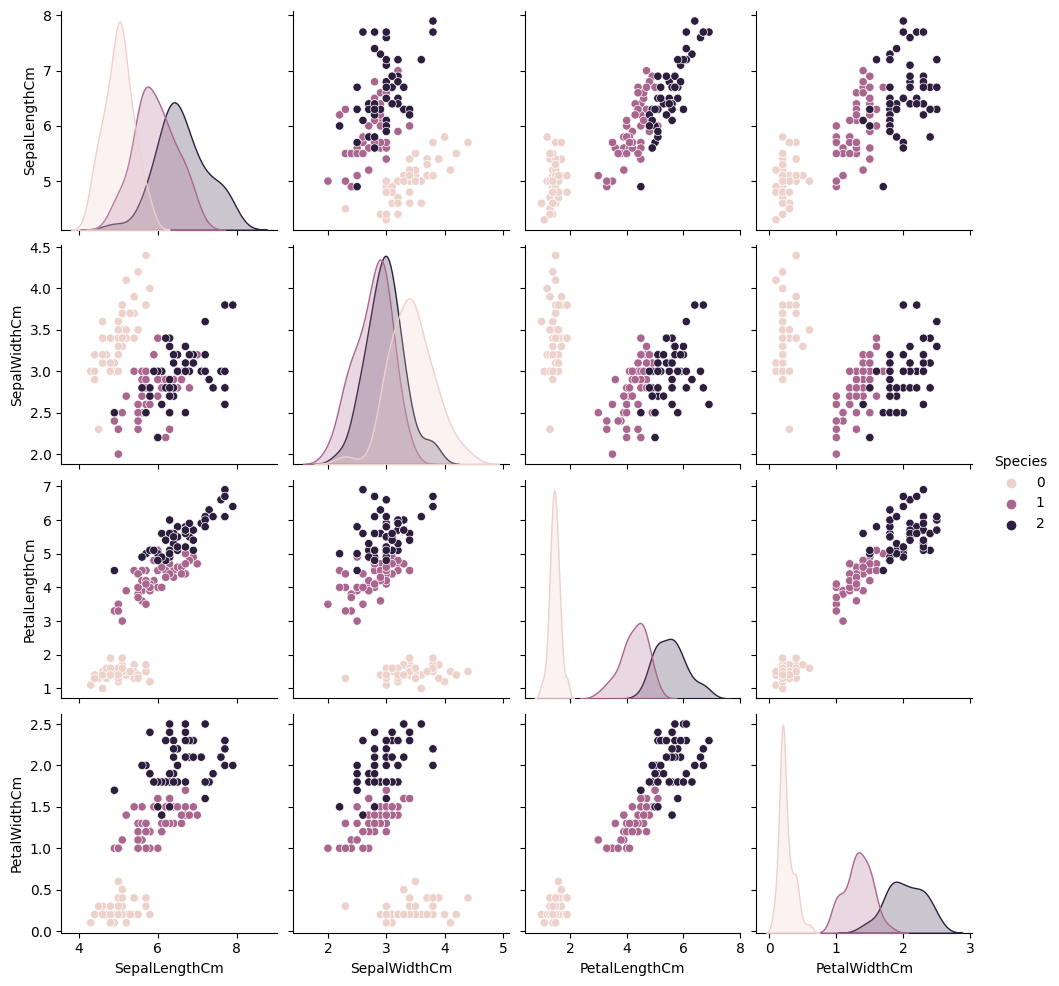

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=iris_cleaned)
plt.title('Class Distribution (Cleaned Data)')
plt.show()

# Temizlenmiş veri seti ile çift değişkenli analiz (Pairplot)
sns.pairplot(iris_cleaned, hue='Species')
plt.show()

#### Checking balance of dataset

In [24]:
iris = iris_cleaned

In [25]:
print("Number of rows after removing duplicates: ", len(iris))

Number of rows after removing duplicates:  147


In [26]:
class_distribution = iris['Species'].value_counts()
print(class_distribution)

1    50
2    49
0    48
Name: Species, dtype: int64


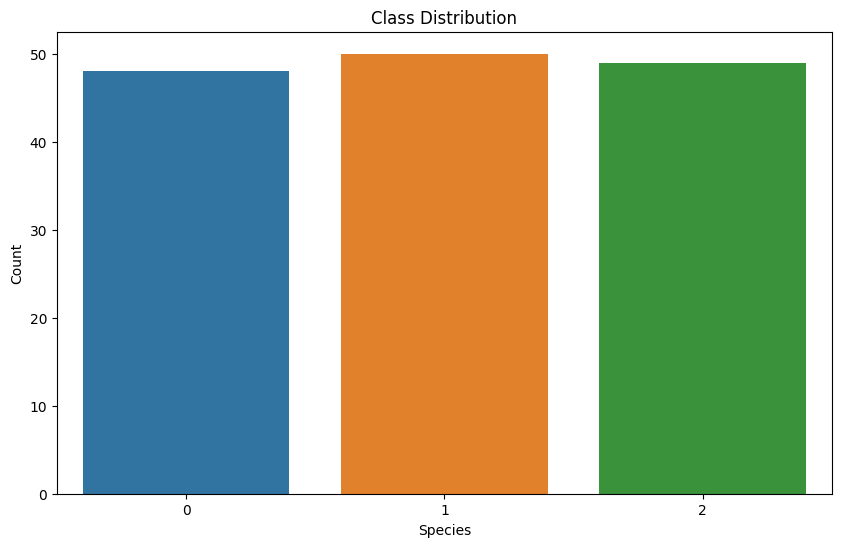

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıf dağılımının grafiksel gösterimi
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=iris)
plt.title('Class Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

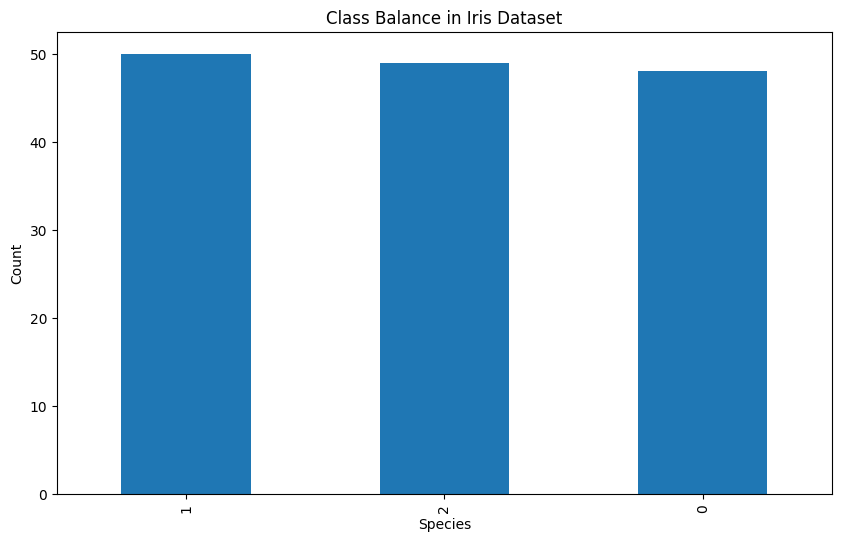

In [28]:
# Veri seti dengesini kontrol etmek için çubuk grafiği
class_counts = iris['Species'].value_counts()
class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Class Balance in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [29]:
# Veri seti dengesini hesaplama
total_samples = len(iris)
balance = class_distribution / total_samples

print("Class balance as proportion of total samples:")
print(balance)

Class balance as proportion of total samples:
1    0.340136
2    0.333333
0    0.326531
Name: Species, dtype: float64


Bu oranlar şu şekilde ifade edilebilir:

Sınıf 1: %34.01
Sınıf 2: %33.33
Sınıf 0: %32.65
Bu oranlar birbirine oldukça yakındır ve veri setinin dengeli olduğunu gösterir.



### Pair-plots for features

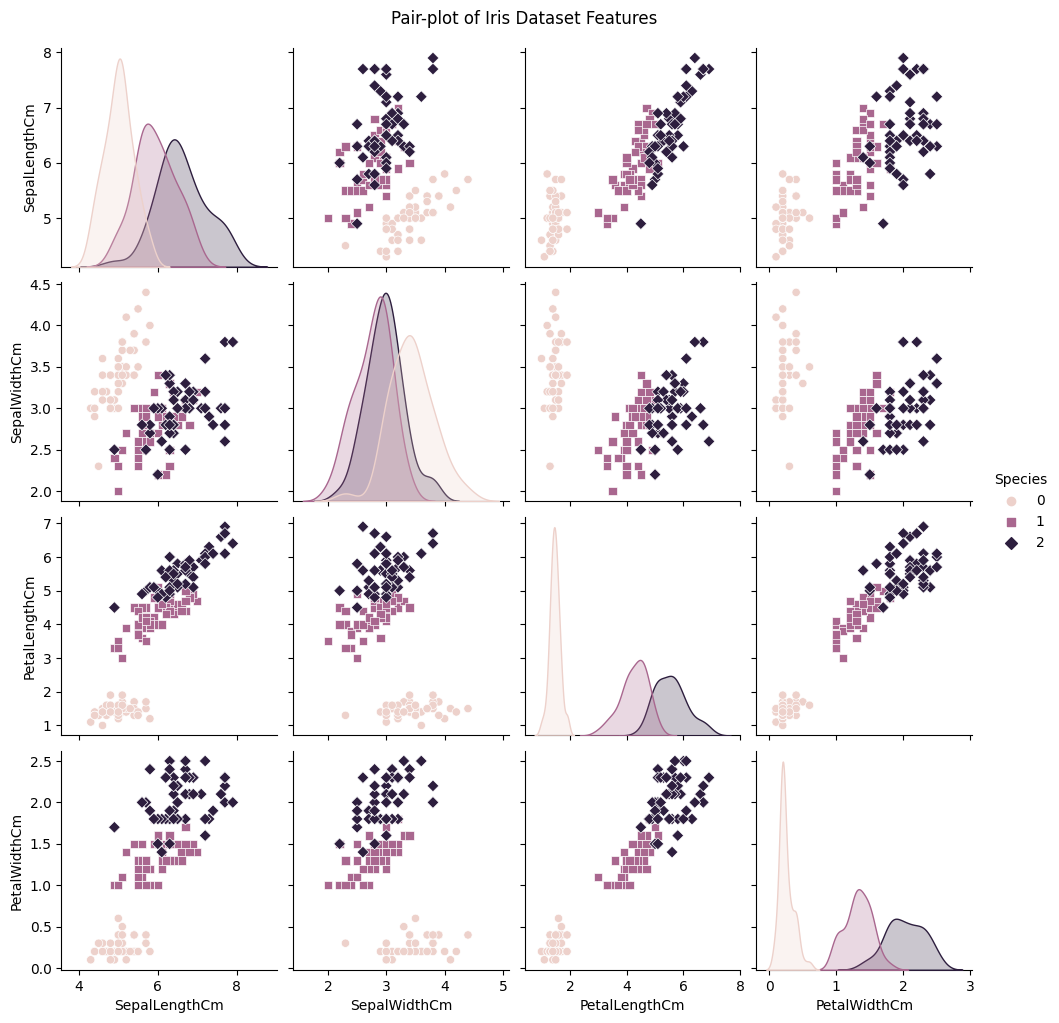

In [30]:
sns.pairplot(iris, hue='Species', markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle("Pair-plot of Iris Dataset Features", y=1.02)
plt.show()

### Correlation Matrix of Features - Correlation Matrix of Features and Target

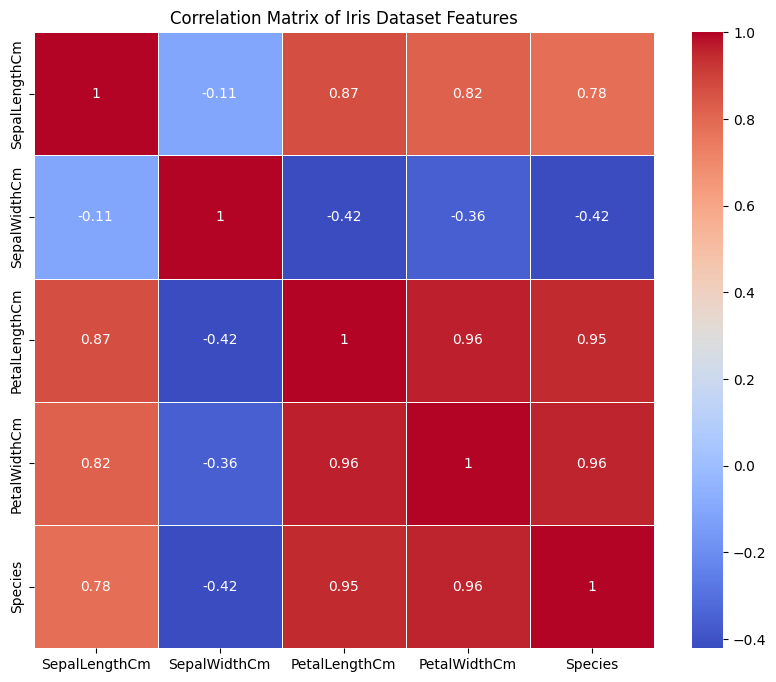

In [31]:
correlation_matrix = iris.corr()

# Korelasyon matrisini ısı haritası olarak görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

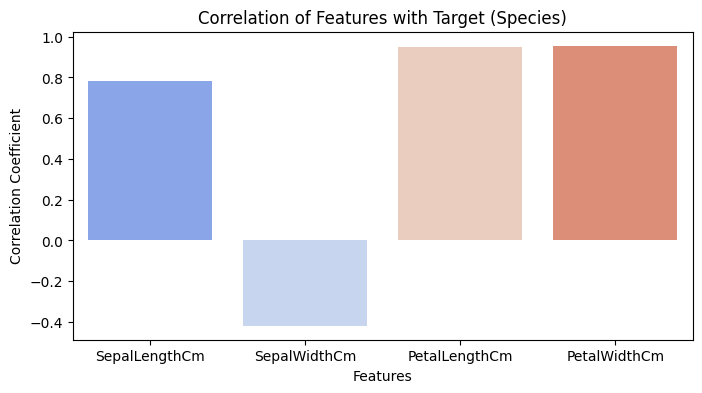

In [32]:
# Hedef özellik ile diğer özellikler arasındaki korelasyonu hesapla
target_correlation = iris.corr()['Species'].drop('Species')

# Hedef özellik ile diğer özellikler arasındaki korelasyonu görselleştir
plt.figure(figsize=(8, 4))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='coolwarm')
plt.title('Correlation of Features with Target (Species)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Train Decision Tree classifier

In [33]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [34]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

## Train The Decision Tree Classifier

In [35]:
clf.fit(X_train_list,y_train_list);

## Predict Class of Test values

In [36]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);


Test Features Expected Classification
[0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0]
Prediction
[0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 0]


# Train K Means Cluster Classifier

Creat elbow method to dertermine ideal number of clusters

In [51]:
def calculate_wcss_and_plot_elbow(X):
    import matplotlib.pyplot as plt
    
    wcss = []
    for i in range(1, 11):
        kmeans = KMeansClusterClassifier(n_cluster=i)
        kmeans.fit(X)
        
        # WCSS değerini hesapla
        wcss_value = 0
        for j in range(len(X)):
            center = kmeans.centerL[kmeans.labels[j]]
            wcss_value += kmeans._euclidean_distance(X[j], center) ** 2
        wcss.append(wcss_value)
    
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

## Elbow Method

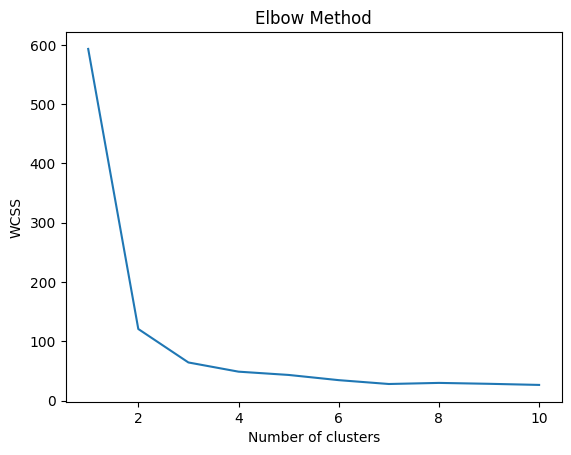

In [56]:
calculate_wcss_and_plot_elbow(X_train_list)

Küme Sayısı: 1'den 2'ye geçiş: WCSS değerlerinde büyük bir düşüş var.
Küme Sayısı: 2'den 3'e geçiş: WCSS değerlerinde yine büyük bir düşüş var.
Küme Sayısı: 3'ten 4'e geçiş: WCSS değerlerindeki azalma hızı belirgin şekilde yavaşlıyor.
Küme Sayısı: 4'ten sonra: Azalma hızı oldukça sabit ve küçük.
Bu gözlemlerle, elbow point'in 3 olduğu sonucuna varabiliriz çünkü:

3 kümeden sonra WCSS değerlerindeki azalma hızı belirgin şekilde yavaşlıyor.
Grafikte belirgin bir "dirsek" 3 kümede oluşuyor.
Sonuç:
Elbow point'in 3 olduğu sonucuna varıyorum. Bu, veri setinizin üç ana küme etrafında gruplandığını ve üç küme kullanmanın optimal bir çözüm olduğunu gösterir.

## Train The K Means Cluster Classifier

In [71]:
clf2=KMeansClusterClassifier(n_cluster=3)
clf2.fit(X_train_list,y_train_list);

## Plot of 3D Cluster

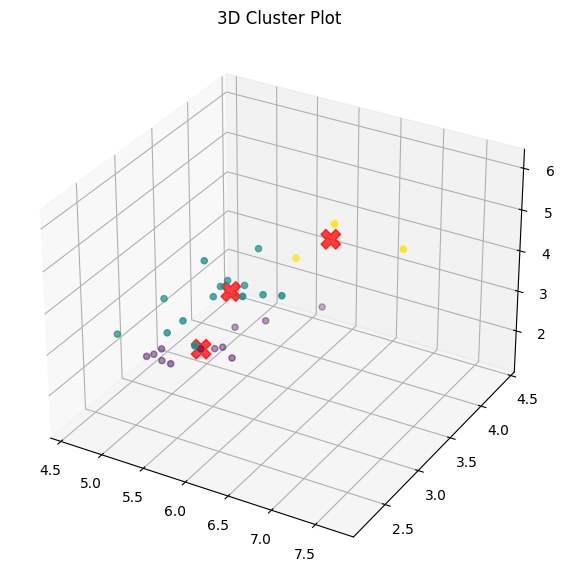

In [72]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tahmin edilen küme etiketlerini al
labels = clf2.predict(X_test_list)

X_test = np.array(X_test_list)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=labels, cmap='viridis', marker='o')

# Küme merkezlerini scatter plot ile göster
centers = np.array(clf2.centerL)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
ax.set_title('3D Cluster Plot')

plt.show()

## Predict Class of Test values

In [73]:
yhat_km = clf2.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat_km);

Test Features Expected Classification
[0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0]
Prediction
[0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0]


# Results

### Confusion Matrix of Decision TreeTest

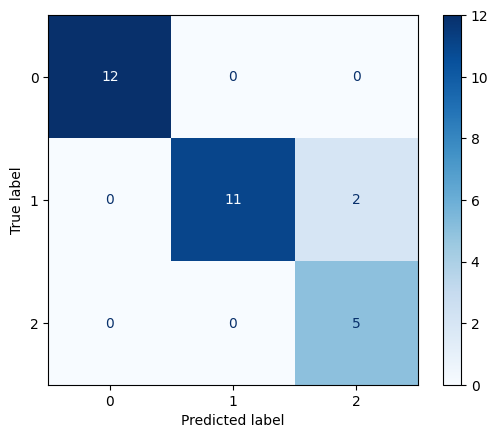

In [74]:
# Karmaşıklık matrisi hesaplama
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_list, yhat)


class_labels = list(set(y_test_list))

# Karmaşıklık matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Confusion Matrix of K Means Cluster Test

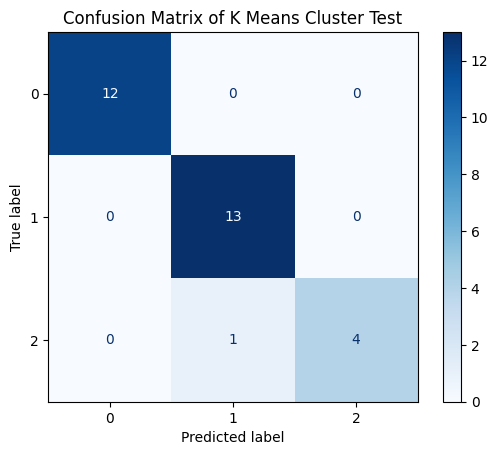

In [75]:
cm = confusion_matrix(y_test_list, yhat_km)

# Benzersiz sınıf etiketlerini y_test_list veya yhat_km'den alabiliriz
class_labels = list(set(y_test_list))

# Karmaşıklık matrisini görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of K Means Cluster Test")
plt.show()

### F1-Score of Decision Tree Classifier and K Means Cluster Classifier

In [76]:
# F1-Skorlarını hesaplama
from sklearn.metrics import f1_score
f1_score_dt = f1_score(y_test_list, yhat, average='weighted')
f1_score_km = f1_score(y_test_list, yhat_km, average='weighted')

f1_score_dt, f1_score_km

(0.936111111111111, 0.965432098765432)

### Accuracy of Decision Tree Classifier and K Means Cluster Classifier

In [77]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_dt = accuracy_score(y_test_list, yhat)
print(f'Decision Tree Classifier Doğruluğu: {accuracy_dt:.2f}')

# K-Means Cluster Classifier doğruluğu
accuracy_km = accuracy_score(y_test_list, yhat_km)
print(f'K-Means Cluster Classifier Doğruluğu: {accuracy_km:.2f}')

Decision Tree Classifier Doğruluğu: 0.93
K-Means Cluster Classifier Doğruluğu: 0.97


### Precision of Decision Tree Classifier and K Means Cluster Classifier

In [82]:
from sklearn.metrics import precision_score

In [83]:
precision_dt = precision_score(y_test_list, yhat, average='weighted')
print(f'Decision Tree Classifier precision: {precision_dt:.2f}')

# K-Means Cluster Classifier hassasiyeti
precision_km = precision_score(y_test_list, yhat_km, average='weighted')
print(f'K-Means Cluster Classifier precision: {precision_km:.2f}')

Decision Tree Classifier precision: 0.95
K-Means Cluster Classifier precision: 0.97


### Recal of Decision Tree Classifier and K Means Cluster Classifier

In [84]:
from sklearn.metrics import recall_score

In [85]:
recall_dt = recall_score(y_test_list, yhat, average='weighted')
print(f'Decision Tree Classifier Geri Çağırma: {recall_dt:.2f}')

# K-Means Cluster Classifier geri çağırma
recall_km = recall_score(y_test_list, yhat_km, average='weighted')
print(f'K-Means Cluster Classifier Geri Çağırma: {recall_km:.2f}')

Decision Tree Classifier Geri Çağırma: 0.93
K-Means Cluster Classifier Geri Çağırma: 0.97


### Plot of ROC Curve (Decision Tree/K Means Cluster) and Value of AUC (Decision Tree/K Means Cluster)

In [86]:
from sklearn.preprocessing import label_binarize # type: ignore
from sklearn.metrics import roc_curve, roc_auc_score # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

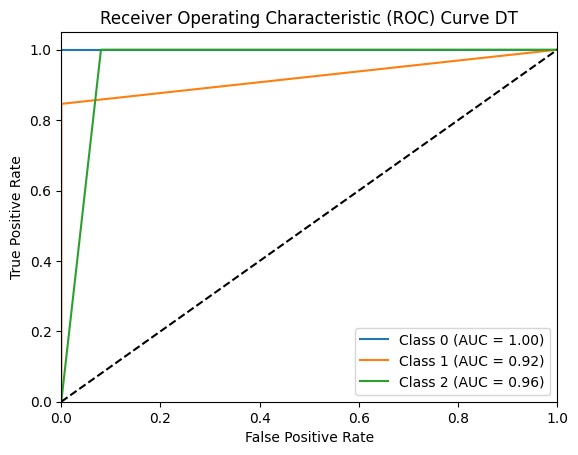

In [87]:
# y'yi binary formata dönüştür
y_test_binarized = label_binarize(y_test_list, classes=[0, 1, 2])
y_train_binarized = label_binarize(y_train_list, classes=[0, 1, 2])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2])

# ROC eğrisi 
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], yhat_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], yhat_binarized[:, i])

# ROC eğrisi çizimi
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve DT')
plt.legend(loc='lower right')
plt.show()



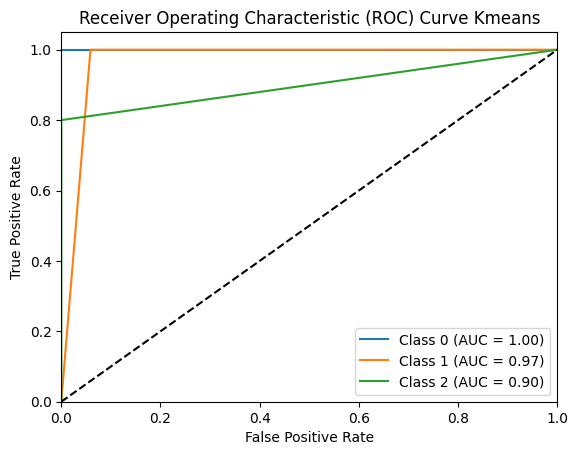

In [89]:
# y'yi binary formata dönüştür
y_test_binarized = label_binarize(y_test_list, classes=[0, 1, 2])
y_train_binarized = label_binarize(y_train_list, classes=[0, 1, 2])
yhat_binarized = label_binarize(yhat_km, classes=[0, 1, 2])

# ROC eğrisi 
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], yhat_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], yhat_binarized[:, i])

# ROC eğrisi çizimi
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Kmeans')
plt.legend(loc='lower right')
plt.show()



- Decision Tree:
+ Avantajları:

Yorumlanabilirlik: Karar ağaçları daha iyi yorumlanabilir ve görselleştirilebilir, bu da hangi özelliklerin sınıflandırmada nasıl bir rol oynadığını anlamayı kolaylaştırır.
Doğruluk: Yüksek doğruluk ve precision değerlerine sahip, özellikle karmaşık veri yapılarında iyi performans gösterir.
Hız: Eğitim ve tahmin süreci genellikle hızlıdır ve büyük veri setlerinde iyi ölçeklenir.
- Dezavantajları:

Aşırı Uydurma (Overfitting): Karar ağaçları, veri setinde fazla büyüyebilir ve aşırı uyum gösterebilir. Bu, genel performansı düşürebilir.
Dengeli Olmayan Veriler: Sınıf dengesizlikleri durumunda performans düşebilir ve bazı sınıflara fazla odaklanabilir.
- K-Means Cluster Classifier:
+ Avantajları:

Basitlik: K-Means algoritması basit ve hızlıdır, büyük veri setlerinde etkili bir şekilde çalışır.
Genel Performans: Kümelenme tabanlı yaklaşımlar, veri setinin genel yapısını anlamada ve kümelenmelerin özelliklerini çıkarmada etkilidir.
Doğruluk: K-Means, doğru ve hassas tahminler yapabilir, özellikle veri setinin iyi kümelenebileceği durumlarda yüksek performans gösterir.
- Dezavantajları:

Özellik Seçimi: Özellikle doğru kümelenme merkezlerini seçmek zordur ve sonuçlar başlangıç noktalarına duyarlıdır.
Yorumlanabilirlik: Karar ağaçları kadar kolay yorumlanamaz, çünkü kümelerin ne anlama geldiğini anlamak her zaman açık değildir.
Hangi Durumlarda Hangi Yöntem Kullanılmalı?
Karar Ağaçları (Decision Tree): Özellikle açıklayıcı ve yorumlanabilir sonuçların önemli olduğu durumlarda, özelliklerin sınıflandırmada nasıl bir rol oynadığını anlamak istediğinizde kullanışlıdır.
K-Means Clustering: Verilerin doğal kümelenmelerini anlamak istediğinizde ve genel performans ve doğruluk önemli olduğunda daha uygun olabilir.